<h1>Pandas</h1>

<h2>Important data update</h2>
Because of changes to both google as well as yahoo API, pandas datareader has become unreliable. It mostly works with python 3.6, yahoo, and the latest version of pandas datareader, but not always. Google API no longer works. 

If you can't get data from yahoo, please use the two files ibm.pickle and regression_data.pickle included here.

In [2]:
#installing pandas libraries
#!pip install  --upgrade pandas-datareader==0.5.0
#!pip install --upgrade html5lib==1.0b8

#There is a bug in the latest version of html5lib so install an earlier version
#Restart kernel after installing html5lib

<h2>Imports</h2>

In [31]:
import pandas as pd #pandas library
from pandas_datareader import data #data readers (google, html, etc.)
#The following line ensures that graphs are rendered in the notebook
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt #Plotting library
import datetime as dt #datetime for timeseries support

<h2>The structure of a dataframe</h2>

In [32]:
pd.DataFrame([[1,2,3],[1,2,3]],columns=['A','B','C'])

,A,B,C
0,1,2,3
1,1,2,3


<h3>Accessing columns and rows</h3>

In [33]:
df = pd.DataFrame([['r1','00','01','02'],['r2','10','11','12'],['r3','20','21','22']],columns=['row_label','A','B','C'])
print(id(df))
print(df)
x = df.set_index('row_label',inplace=True)
print(x)
print(id(df))
df

120510690696
  row_label   A   B   C
0        r1  00  01  02
1        r2  10  11  12
2        r3  20  21  22
None
120510690696


,A,B,C
row_label,,,
r1,00,01,02
r2,10,11,12
r3,20,21,22


<h3>Getting column data</h3>

In [34]:
df.A

row_label
r1    00
r2    10
r3    20
Name: A, dtype: object

In [35]:
df['B']

row_label
r1    01
r2    11
r3    21
Name: B, dtype: object

<h3>Getting row data</h3>

In [44]:
df.iloc[2]

A    20
B    21
C    22
Name: r3, dtype: object

In [45]:
df.loc['r1']

A    00
B    01
C    02
Name: r1, dtype: object

<h3>Getting a row by row number</h3>

In [46]:
df.iloc[0]

A    00
B    01
C    02
Name: r1, dtype: object

<h3>Getting multiple columns<h3>

In [47]:
df[['B','A']] #Note that the column identifiers are in a list

,B,A
row_label,,
r1,01,00
r2,11,10
r3,21,20


In [58]:
# df['B','A'] wrong
import pandas as pd
data = {'nationality': ['UK', 'China', 'US', 'UK', 'Japan', 'China', 'UK', 'UK', 'Japan', 'US'],
        'age': [25, 30, 15, np.nan, 25, 22, np.nan,45 ,18, 33],
        'type': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'diabetes': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

diabetes = pd.DataFrame(data, index=labels)
diabetes

,age,diabetes,nationality,type
a,25.0,yes,UK,1
b,30.0,yes,China,3
c,15.0,no,US,2
d,NaN,yes,UK,3
e,25.0,no,Japan,2
f,22.0,no,China,3
g,NaN,no,UK,1
h,45.0,yes,UK,1
i,18.0,no,Japan,2
j,33.0,no,US,1


In [61]:
#diabetes[diabetes.type>2]
diabetes[diabetes['type']>2]

,age,diabetes,nationality,type
b,30.0,yes,China,3
d,NaN,yes,UK,3
f,22.0,no,China,3


In [62]:
diabetes[diabetes['type'].between(1,2)]

,age,diabetes,nationality,type
a,25.0,yes,UK,1
c,15.0,no,US,2
e,25.0,no,Japan,2
g,NaN,no,UK,1
h,45.0,yes,UK,1
i,18.0,no,Japan,2
j,33.0,no,US,1


In [68]:
diabetes.groupby('nationality')['age'].mean()

nationality
China    26.0
Japan    21.5
UK       35.0
US       24.0
Name: age, dtype: float64

In [81]:
#diabetes.sort_values(by=['age','type'],ascending=[False,True])
diabetes.sort_values(['age','type'],ascending=[False,True])

,age,diabetes,nationality,type
h,45.0,yes,UK,1
j,33.0,no,US,1
b,30.0,yes,China,3
a,25.0,yes,UK,1
e,25.0,no,Japan,2
f,22.0,no,China,3
i,18.0,no,Japan,2
c,15.0,no,US,2
g,NaN,no,UK,1
d,NaN,yes,UK,3


In [92]:
#diabetes['nationality'] = diabetes['nationality'].replace(['US'],'United States')
diabetes['nationality'].replace('US','United States')

a               UK
b            China
c    United States
d               UK
e            Japan
f            China
g               UK
h               UK
i            Japan
j    United States
Name: nationality, dtype: object

<h3>Getting a specific cell</h3>

In [48]:
df.loc['r2','B']

'11'

In [49]:
df.loc['r2']['A']

'10'

<h3>Slicing</h3>

In [50]:
df.loc['r1':'r2']

,A,B,C
row_label,,,
r1,00,01,02
r2,10,11,12


In [51]:
df.loc['r1':'r2','B':'C']

,B,C
row_label,,
r1,01,02
r2,11,12


<h2>Pandas datareader</h2>
<li>Access data from html tables on any web page</li>
<li>Get data from google finance</li>
<li>Get data from the federal reserve</li>

<h3>HTML Tables</h3>
<li>Pandas datareader can read a table in an html page into a dataframe
<li>the read_html function returns a list of all dataframes with one dataframe for each html table on the page

<table>
<tr><td>c1</td></tr>
</table>

<h4>Example: Read the tables on the google finance page</h4>

In [14]:
#df_list = pd.read_html('http://www.bloomberg.com/markets/currencies/major')
# df_list = pd.read_html('https://www.bloomberg.com/markets/currencies/americas')
# print(len(df_list))

<h4>The page contains only one table so the read_html function returns a list of one element</h4>

In [15]:
# df = df_list[0]
# print(df)

<h4>Note that the read_html function has automatically detected the header columns</h4>
<h4>If an index is necessary, we need to explicitly specify it</h4>

In [16]:
# df.set_index('Currency',inplace=True)
# print(df)

<h4>Now we can use .loc to extract specific currency rates</h4>

In [17]:
# df.loc['EUR-CHF','Value']

<h3>Working with views and copies</h3>

<h4>Chained indexing creates a copy and changes to the copy won't be reflected in the original dataframe</h4>

In [18]:
# eur_usd = df.loc['EUR-USD']['Change'] #This is chained indexing
# df.loc['EUR-USD']['Change'] = 1.0 #Here we are changing a value in a copy of the dataframe
# print(eur_usd)
# print(df.loc['EUR-USD']['Change']) #Neither eur_usd, nor the dataframe are changed

In [19]:
# eur_usd = df.loc['EUR-USD','Change'] #eur_usd points to the value inside the dataframe
# df.loc['EUR-USD','Change'] = 1.0 #Change the value in the view 
# print(eur_usd) #eur_usd is changed (because it points to the view)
# print(df.loc['EUR-USD']['Change']) #The dataframe has been correctly updated

<h2>Getting historical stock prices from Yahoo financs</h2>
Usage: DataReader(ticker,source,startdate,enddate)<br>



In [8]:
from pandas_datareader import data
import datetime as dt
start=dt.datetime(2017, 1, 1)
end=dt.datetime.today()

print(start,end)

#df = data.DataReader('TSLA', 'yahoo', start, end)
df = data.DataReader('600887.SS', 'yahoo', start, end)
#df = data.DataReader('IBM', 'google', start, end)


2017-01-01 00:00:00 2018-04-13 11:03:50.712866


In [9]:
#df.to_pickle("ibm.pickle")

In [10]:
#If you're having issues with yahoo, uncomment the following line and run this cell
#Make sure you've downloaded ibm.pickle

#df = pandas.read_pickle("ibm.pickle")

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,17.600000,17.910000,17.520000,17.690001,17.113779,29032216
2017-01-04,17.709999,17.910000,17.629999,17.900000,17.316938,35946942
2017-01-05,17.900000,17.980000,17.830000,17.879999,17.297588,17001644
2017-01-06,17.950001,17.950001,17.620001,17.650000,17.075081,27249614
2017-01-09,17.590000,17.719999,17.580000,17.670000,17.094431,21439522
2017-01-10,17.740000,17.870001,17.680000,17.830000,17.249218,31014829
2017-01-11,17.799999,17.799999,17.660000,17.690001,17.113779,18374604
2017-01-12,17.700001,17.750000,17.500000,17.510000,16.939642,19919560
2017-01-13,17.510000,17.700001,17.379999,17.600000,17.026711,29013479


<h2>Datareader documentation</h2>
http://pandas-datareader.readthedocs.io/en/latest/</h2>

<h3>Working with a timeseries data frame</h3>
<li>The data is organized by time with the index serving as the timeline


<h4>Creating new columns</h4>
<li>Add a column to a dataframe
<li>Base the elements of the column on some combination of data in the existing columns
<h4>Example: Number of Days that the stock closed higher than it opened
<li>We'll create a new column with the header "UP"
<li>And use np.where to decide what to put in the column

In [15]:
df['UP']=np.where(df['Close']>df['Open'],1,0)
df

,Open,High,Low,Close,Adj Close,Volume,UP
Date,,,,,,,
2017-01-03,17.600000,17.910000,17.520000,17.690001,17.113779,29032216,1
2017-01-04,17.709999,17.910000,17.629999,17.900000,17.316938,35946942,1
2017-01-05,17.900000,17.980000,17.830000,17.879999,17.297588,17001644,0
2017-01-06,17.950001,17.950001,17.620001,17.650000,17.075081,27249614,0
2017-01-09,17.590000,17.719999,17.580000,17.670000,17.094431,21439522,1
2017-01-10,17.740000,17.870001,17.680000,17.830000,17.249218,31014829,1
2017-01-11,17.799999,17.799999,17.660000,17.690001,17.113779,18374604,0
2017-01-12,17.700001,17.750000,17.500000,17.510000,16.939642,19919560,0
2017-01-13,17.510000,17.700001,17.379999,17.600000,17.026711,29013479,1


<h3>Get summary statistics</h3>
<li>The "describe" function returns a dataframe containing summary stats for all numerical columns
<li>Columns containing non-numerical data are ignored

In [16]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,UP
count,311.000000,311.000000,311.000000,311.000000,311.000000,3.110000e+02,311.000000
mean,24.543730,24.930193,24.207170,24.595563,24.438134,5.960355e+07,0.514469
std,5.864362,6.043717,5.699242,5.877204,6.048772,2.762012e+07,0.500596
min,17.450001,17.629999,17.379999,17.410000,16.939642,0.000000e+00,0.000000
25%,18.735000,18.959999,18.524999,18.825001,18.298876,4.095333e+07,0.000000
50%,22.950001,23.340000,22.760000,22.990000,22.990000,5.470945e+07,1.000000
75%,29.960000,30.735000,29.450000,30.235001,30.235001,7.635070e+07,1.000000
max,35.570000,35.930000,34.849998,35.459999,35.459999,1.628855e+08,1.000000


<h4>Calculate the percentage of days that the stock has closed higher than its open</h4>

In [17]:
higher = df['UP'].sum()/df['UP'].count()
higher*100

51.446945337620576

<h4>Calculate percent changes</h4>
<li>The function pct_change computes a percent change between successive rows (times in  timeseries data)
<li>Defaults to a single time delta
<li>With an argument, the time delta can be changed

In [18]:
df['Close'].pct_change() #One timeperiod percent change

Date
2017-01-03         NaN
2017-01-04    0.011871
2017-01-05   -0.001117
2017-01-06   -0.012863
2017-01-09    0.001133
2017-01-10    0.009055
2017-01-11   -0.007852
2017-01-12   -0.010175
2017-01-13    0.005140
2017-01-16    0.018750
2017-01-17    0.005577
2017-01-18    0.006101
2017-01-19    0.004410
2017-01-20    0.003293
2017-01-23   -0.001094
2017-01-24   -0.002738
2017-01-25    0.009885
2017-01-26    0.001088
2017-02-03   -0.009234
2017-02-06   -0.004934
2017-02-07   -0.003306
2017-02-08    0.000553
2017-02-09    0.000000
2017-02-10    0.003315
2017-02-13    0.019824
2017-02-14   -0.017279
2017-02-15   -0.016484
2017-02-16   -0.003352
2017-02-17    0.007848
2017-02-20    0.011680
                ...   
2018-03-01   -0.001233
2018-03-02   -0.004320
2018-03-05    0.003409
2018-03-06   -0.012045
2018-03-07   -0.032823
2018-03-08    0.018100
2018-03-09   -0.013016
2018-03-12   -0.006111
2018-03-13    0.013916
2018-03-14    0.001915
2018-03-15    0.020707
2018-03-16   -0.033084
2018-0

In [19]:
n=13
df['Close'].pct_change(n) #n timeperiods percent change

Date
2017-01-03         NaN
2017-01-04         NaN
2017-01-05         NaN
2017-01-06         NaN
2017-01-09         NaN
2017-01-10         NaN
2017-01-11         NaN
2017-01-12         NaN
2017-01-13         NaN
2017-01-16         NaN
2017-01-17         NaN
2017-01-18         NaN
2017-01-19         NaN
2017-01-20    0.033352
2017-01-23    0.020112
2017-01-24    0.018456
2017-01-25    0.041926
2017-01-26    0.041879
2017-02-03    0.022995
2017-02-06    0.026003
2017-02-07    0.033124
2017-02-08    0.028409
2017-02-09    0.009481
2017-02-10    0.007210
2017-02-13    0.020948
2017-02-14   -0.001098
2017-02-15   -0.020788
2017-02-16   -0.023001
2017-02-17   -0.012630
2017-02-20   -0.010875
                ...   
2018-03-01   -0.018474
2018-03-02   -0.022417
2018-03-05    0.027284
2018-03-06    0.015233
2018-03-07   -0.009920
2018-03-08   -0.004739
2018-03-09   -0.037461
2018-03-12   -0.041860
2018-03-13   -0.085255
2018-03-14   -0.076493
2018-03-15   -0.062610
2018-03-16   -0.080439
2018-0

<h3>NaN support</h3>
Pandas functions can ignore NaNs

In [21]:
n=13
df['Close'].pct_change(n).mean()

0.022336982277108043

<h3>Rolling windows</h3>
<li>"rolling" function extracts rolling windows
<li>For example, the 21 period rolling window of the 13 period percent change 

In [22]:
df['Close'].pct_change(n).rolling(21)

Rolling [window=21,center=False,axis=0]

<h4>Calculate something on the rolling windows</h4>

<h4>Example: mean (the 21 day moving average of the 13 day percent change)

In [23]:
n=13
df['Close'].pct_change(n).rolling(21).mean()

Date
2017-01-03         NaN
2017-01-04         NaN
2017-01-05         NaN
2017-01-06         NaN
2017-01-09         NaN
2017-01-10         NaN
2017-01-11         NaN
2017-01-12         NaN
2017-01-13         NaN
2017-01-16         NaN
2017-01-17         NaN
2017-01-18         NaN
2017-01-19         NaN
2017-01-20         NaN
2017-01-23         NaN
2017-01-24         NaN
2017-01-25         NaN
2017-01-26         NaN
2017-02-03         NaN
2017-02-06         NaN
2017-02-07         NaN
2017-02-08         NaN
2017-02-09         NaN
2017-02-10         NaN
2017-02-13         NaN
2017-02-14         NaN
2017-02-15         NaN
2017-02-16         NaN
2017-02-17         NaN
2017-02-20         NaN
                ...   
2018-03-01   -0.033151
2018-03-02   -0.035410
2018-03-05   -0.034180
2018-03-06   -0.031872
2018-03-07   -0.031093
2018-03-08   -0.030334
2018-03-09   -0.032436
2018-03-12   -0.034623
2018-03-13   -0.036521
2018-03-14   -0.038439
2018-03-15   -0.038460
2018-03-16   -0.037554
2018-0

<h4>Calculate several moving averages and graph them</h4>

In [24]:
#df['Close'].pct_change(n).rolling(21).mean()
ma_8 = df['Close'].pct_change(n).rolling(window=8).mean()
ma_13= df['Close'].pct_change(n).rolling(window=13).mean()
ma_21= df['Close'].pct_change(n).rolling(window=21).mean()
ma_34= df['Close'].pct_change(n).rolling(window=34).mean()
ma_55= df['Close'].pct_change(n).rolling(window=55).mean()

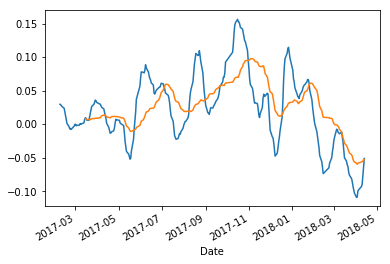

In [25]:
ma_8.plot()
ma_34.plot()

<h2>Linear regression with pandas</h2>
<h4>Example: TAN is the ticker for a solar ETF. FSLR, RGSE, and SPWR are tickers of companies that build or lease solar panels. Each has a different business model. We'll use pandas to study the risk reward tradeoff between the 4 investments and also see how correlated they are</h4>

In [3]:
import datetime
import pandas_datareader as data
start = datetime.datetime(2017,4,1)
end = datetime.datetime(2018,4,1)
#end=dt.datetime.today()
print(start,end)

solar_df = data.DataReader(['FSLR', 'TAN','RGSE','SPWR'],'yahoo', start=start,end=end)['Close']
solar_df1 = data.DataReader(['600036.SS', '000001.SZ','600016.SS','601166.SS'],'yahoo', start=start,end=end)['Close']

2017-04-01 00:00:00 2018-04-01 00:00:00


In [4]:
#If you're having issues with yahoo, uncomment the following line and run this cell
#Make sure you've downloaded regression_data.pickle
#solar_df = pandas.read_pickle("regression_data.pickle")


In [5]:
solar_df

,FSLR,RGSE,SPWR,TAN
Date,,,,
2018-03-29,70.980003,0.98,7.98,24.559999
2018-03-28,69.320000,1.06,7.66,24.270000
2018-03-27,71.510002,1.05,7.88,25.020000
2018-03-26,74.019997,1.09,8.24,25.670000
2018-03-23,70.650002,1.11,7.74,24.639999
2018-03-22,72.089996,1.11,7.76,24.879999
2018-03-21,73.870003,1.19,8.04,25.830000
2018-03-20,73.000000,1.09,8.04,25.620001
2018-03-19,71.260002,1.08,7.47,25.260000


<h4>Let's calculate returns (the 1 day percent change)</h4>

In [6]:
rets = solar_df.pct_change()
print(rets)

                FSLR      RGSE      SPWR       TAN
Date                                              
2018-03-29       NaN       NaN       NaN       NaN
2018-03-28 -0.023387  0.081633 -0.040100 -0.011808
2018-03-27  0.031593 -0.009434  0.028721  0.030902
2018-03-26  0.035100  0.038095  0.045685  0.025979
2018-03-23 -0.045528  0.018349 -0.060680 -0.040125
2018-03-22  0.020382  0.000000  0.002584  0.009740
2018-03-21  0.024691  0.072072  0.036082  0.038183
2018-03-20 -0.011777 -0.084034  0.000000 -0.008130
2018-03-19 -0.023836 -0.009174 -0.070896 -0.014052
2018-03-16 -0.019506  0.018519 -0.034806 -0.001584
2018-03-15 -0.016173 -0.009091 -0.024965 -0.002379
2018-03-14  0.011347 -0.009174  0.021337  0.004770
2018-03-13 -0.005322  0.027778  0.001393 -0.003560
2018-03-12  0.013015  0.018018  0.012517  0.008734
2018-03-09 -0.030692 -0.008850 -0.016484 -0.006297
2018-03-08 -0.003093 -0.008929  0.039106 -0.014654
2018-03-07  0.003841 -0.018018 -0.012097 -0.005225
2018-03-06 -0.007358 -0.009174 

In [193]:
solar_df1

,000001.SZ,600016.SS,600036.SS,601166.SS
Date,,,,
2018-03-30,10.90,7.99,29.090000,16.690001
2018-03-29,11.05,8.08,29.309999,16.910000
2018-03-28,10.89,7.99,28.700001,16.830000
2018-03-27,10.94,8.00,28.719999,16.900000
2018-03-26,10.93,7.96,29.110001,16.850000
2018-03-23,11.34,7.98,30.309999,17.219999
2018-03-22,11.66,8.25,31.230000,17.450001
2018-03-21,11.90,8.29,31.260000,17.480000
2018-03-20,11.82,8.30,30.990000,17.480000


In [181]:
rets1 = solar_df1.pct_change(21)
print(rets1)

            000001.SZ  600016.SS  600036.SS  601166.SS
Date                                                  
2018-03-30        NaN        NaN        NaN        NaN
2018-03-29        NaN        NaN        NaN        NaN
2018-03-28        NaN        NaN        NaN        NaN
2018-03-27        NaN        NaN        NaN        NaN
2018-03-26        NaN        NaN        NaN        NaN
2018-03-23        NaN        NaN        NaN        NaN
2018-03-22        NaN        NaN        NaN        NaN
2018-03-21        NaN        NaN        NaN        NaN
2018-03-20        NaN        NaN        NaN        NaN
2018-03-19        NaN        NaN        NaN        NaN
2018-03-16        NaN        NaN        NaN        NaN
2018-03-15        NaN        NaN        NaN        NaN
2018-03-14        NaN        NaN        NaN        NaN
2018-03-13        NaN        NaN        NaN        NaN
2018-03-12        NaN        NaN        NaN        NaN
2018-03-09        NaN        NaN        NaN        NaN
2018-03-08

<h4>Let's visualize the relationship between each stock and the ETF</h4>

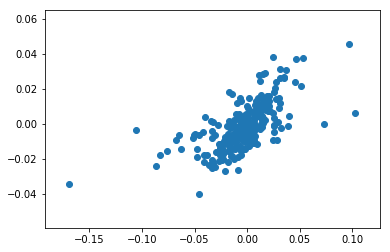

In [166]:
import matplotlib.pyplot as plt
plt.scatter(rets.FSLR,rets.TAN)

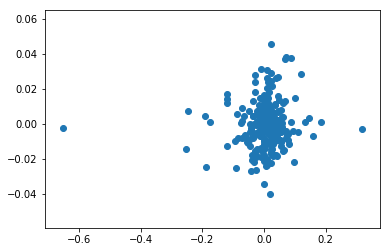

In [167]:
plt.scatter(rets.RGSE,rets.TAN)

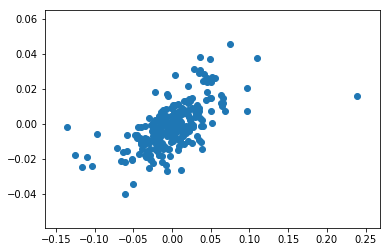

In [168]:
plt.scatter(rets.SPWR,rets.TAN)

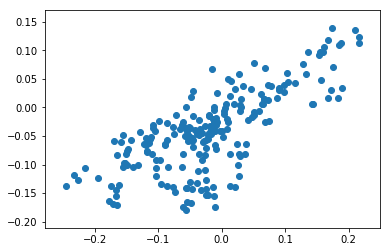

In [182]:
#600036.SS', '000001.SZ','600016.SS','601166.SS
plt.scatter(rets1['000001.SZ'],rets1['600036.SS'])

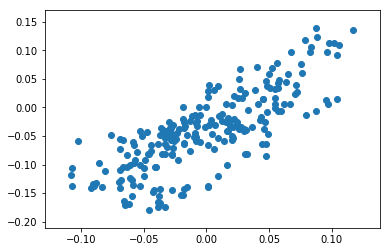

In [183]:
plt.scatter(rets1['600016.SS'],rets1['600036.SS'])

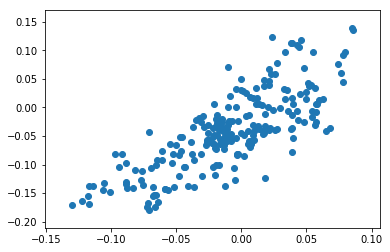

In [184]:
plt.scatter(rets1['601166.SS'],rets1['600036.SS'])

<h4>The correlation matrix</h4>

In [185]:
solar_corr = rets.corr()
print(solar_corr)

          FSLR      RGSE      SPWR       TAN
FSLR  1.000000  0.043732  0.548755  0.646943
RGSE  0.043732  1.000000  0.027434  0.073513
SPWR  0.548755  0.027434  1.000000  0.627039
TAN   0.646943  0.073513  0.627039  1.000000


In [186]:
solar_corr1 = rets1.corr()
print(solar_corr1)

           000001.SZ  600016.SS  600036.SS  601166.SS
000001.SZ   1.000000   0.843707   0.736969   0.587835
600016.SS   0.843707   1.000000   0.789125   0.719031
600036.SS   0.736969   0.789125   1.000000   0.787992
601166.SS   0.587835   0.719031   0.787992   1.000000


<h3>Basic risk analysis</h3>
<h4>We'll plot the mean and std or returns for each ticker to get a sense of the risk return profile</h4>

In [187]:
rets.mean()

FSLR   -0.003453
RGSE    0.004712
SPWR   -0.000360
TAN    -0.001320
dtype: float64

In [188]:
rets.std()

FSLR    0.027702
RGSE    0.071272
SPWR    0.038045
TAN     0.013104
dtype: float64

In [189]:
rets.columns

Index(['FSLR', 'RGSE', 'SPWR', 'TAN'], dtype='object')

In [190]:
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    print(label, x, y)

FSLR -0.0034527186963378732 0.027702002977717882
RGSE 0.004711920892534463 0.07127214625929587
SPWR -0.00036021134945665256 0.03804513320981636
TAN -0.0013200334018698215 0.013104322505922883


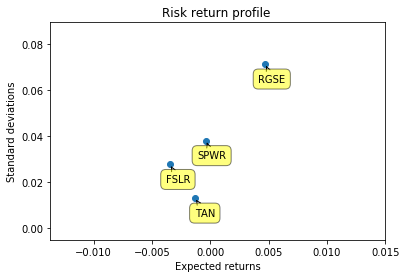

In [191]:
plt.scatter(rets.mean(), rets.std())
plt.title('Risk return profile ')
plt.xlabel('Expected returns')
plt.ylabel('Standard deviations')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.show()

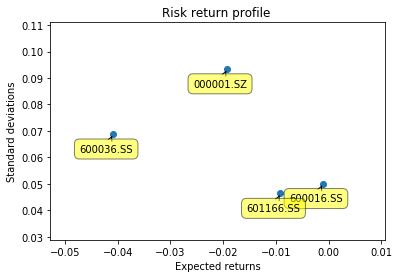

In [192]:
plt.scatter(rets1.mean(), rets1.std())
plt.title('Risk return profile ')
plt.xlabel('Expected returns')
plt.ylabel('Standard deviations')
#['PA', 'MS', 'ZS', 'XY']
for label, x, y in zip(rets1.columns, rets1.mean(), rets1.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.show()


<h2>Regressions</h2>
http://statsmodels.sourceforge.net/

<h3>Steps for regression</h3>
<li>Construct y (dependent variable series)
<li>Construct matrix (dataframe) of X (independent variable series)
<li>Add intercept
<li>Model the regression
<li>Get the results
<h3>The statsmodels library contains various regression packages. We'll use the OLS (Ordinary Least Squares) model

In [27]:
solar_df[['FSLR','RGSE','SPWR']]

,FSLR,RGSE,SPWR
Date,,,
2018-03-29,70.980003,0.98,7.98
2018-03-28,69.320000,1.06,7.66
2018-03-27,71.510002,1.05,7.88
2018-03-26,74.019997,1.09,8.24
2018-03-23,70.650002,1.11,7.74
2018-03-22,72.089996,1.11,7.76
2018-03-21,73.870003,1.19,8.04
2018-03-20,73.000000,1.09,8.04
2018-03-19,71.260002,1.08,7.47


In [26]:
import numpy as np
import statsmodels.api as sm
X=solar_df[['FSLR','RGSE','SPWR']]
X = sm.add_constant(X)
y=solar_df['TAN']
# construct the model
model = sm.OLS(y,X,missing='drop')
# if there's any missing value, then just drop the entire row
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    TAN   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1732.
Date:                Fri, 13 Apr 2018   Prob (F-statistic):          1.59e-165
Time:                        14:24:27   Log-Likelihood:                -224.45
No. Observations:                 251   AIC:                             456.9
Df Residuals:                     247   BIC:                             471.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4462      0.373     25.334      0.0

/Users/william/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [28]:
# What we are interested in is the r-squared
# which is a nice 0.851, which is kind of a good score over there.
# P value

<h4>Finally plot the fitted line with the actual y values

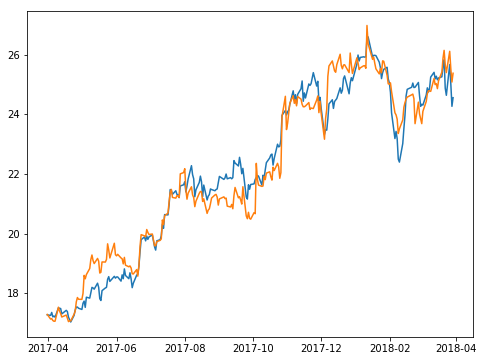

In [29]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(y)
ax.plot(result.fittedvalues)